In [2]:
import pandas as pd 
import jovian
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pyarrow as pa

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)  # Hoặc giá trị lớn hơn

#Lấy dữ liệu và tải  xuống = URL lib
urlretrieve(medical_charges_url, 'medical.csv')
medical_df=pd.read_csv('medical.csv')
# print(medical_df)
# print(medical_df.describe()) 
# print(jovian.commit()) Thực thi hàm jovian.commit() (upload notebook lên cloud)


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14 #  size chữ
matplotlib.rcParams['figure.figsize'] = (10, 6) # kích cỡ figure
matplotlib.rcParams['figure.facecolor'] = "#00000000" # màu nền trông suốt hoàn toàn 

fig = px.histogram( medical_df,
                   x='age',
                   marginal= 'box',
                   nbins=47,
                   title ='Distribution of Age')
fig.update_layout(bargap=0.1)

fig = px.histogram( medical_df,
                   x='bmi',
                   marginal= 'box',
                   color_discrete_sequence=['red'],
                   title ='Distribution of BMI')
fig.update_layout(bargap=0.1)

fig = px.histogram( medical_df,
                   x='charges',
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title ='Annual Medical Charges')
fig.update_layout(bargap=0.1)


medical_df.smoker.value_counts()
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

#Age and Charges
fig = px.scatter( medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity= 0.8, # càng nhỏ càng mờ
                hover_data =['sex', 'bmi'], # hiện thông tin về giới tính lên các điểm của nó => giống như tooltip trong power bi 
                title ='Age vs Charges')
fig.update_traces(marker_size = 5)

#BMI and Charges
fig = px.scatter( medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity= 0.8,
                hover_data =['sex', 'bmi'], 
                title ='BMI vs Charges')
fig.update_traces(marker_size = 5)

px.violin(medical_df, x='children', y='charges')


<IPython.core.display.Javascript object>

In [3]:
#Tính hệ số tương quan
"Tính hệ số tương quan giữa charges và age"
medical_df.charges.corr(medical_df.age) # --> hệ  số tương quan giữa 2 đại lượng này khoảng 0.299
"Tính hệ số tương quan giữa charges và bmi"
medical_df.charges.corr(medical_df.bmi) # --> hệ  số tương quan giữa 2 đại lượng này khoảng 0.198
"Tính hệ số tương quan giữa charges và children"
medical_df.charges.corr(medical_df.children) # --> hệ  số tương quan giữa 2 đại lượng này khoảng 0.068

np.float64(0.06799822684790487)

In [4]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [5]:
smoker_values = {'no':0, 'yes': 1 }
smoker_numeric = medical_df.smoker.map(smoker_values) # map: biến đổi thành phần thành cột 
smoker_numeric
# Tính mối tương quan của smoker với charges
medical_df.charges.corr(smoker_numeric)
# -> mức độ tương quan rất cao khoảng 0.787


np.float64(0.7872514304984778)

In [6]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [7]:
medical_df.select_dtypes(include= 'number').corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

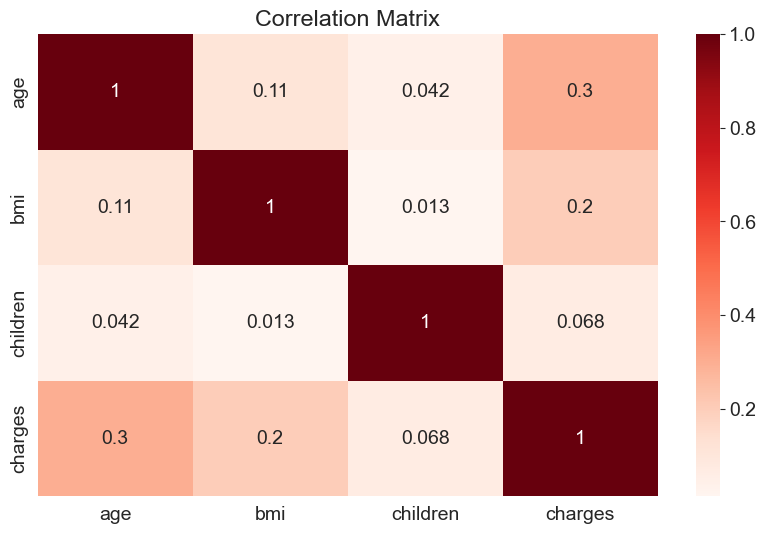

In [8]:
sns.heatmap(medical_df.select_dtypes(include= 'number').corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [9]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

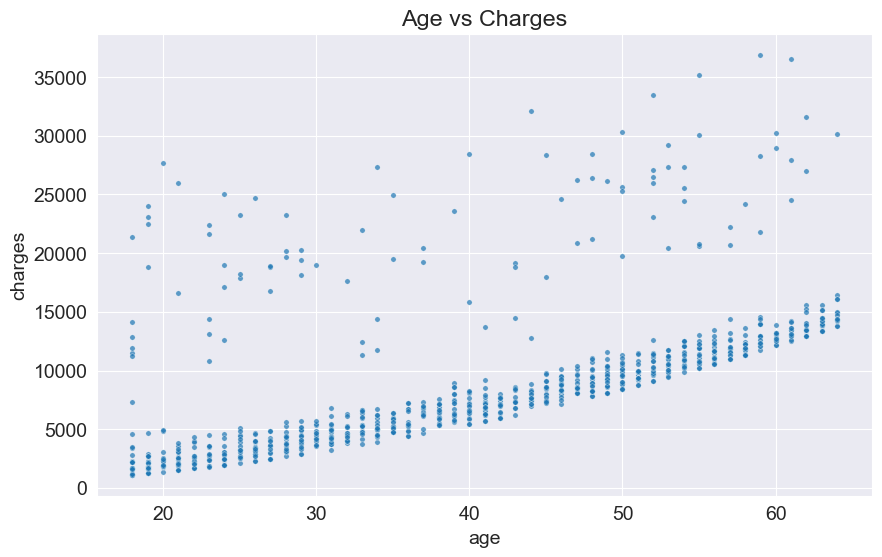

In [10]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,  s=15)

In [11]:
def estimate_charges(age, w, b):
    return w * age + b
w = 50 
b = 100

In [12]:
estimate_charges(40, w, b)

2100

In [13]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [14]:
estimated_charges = estimate_charges(ages, w, b) 
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [15]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

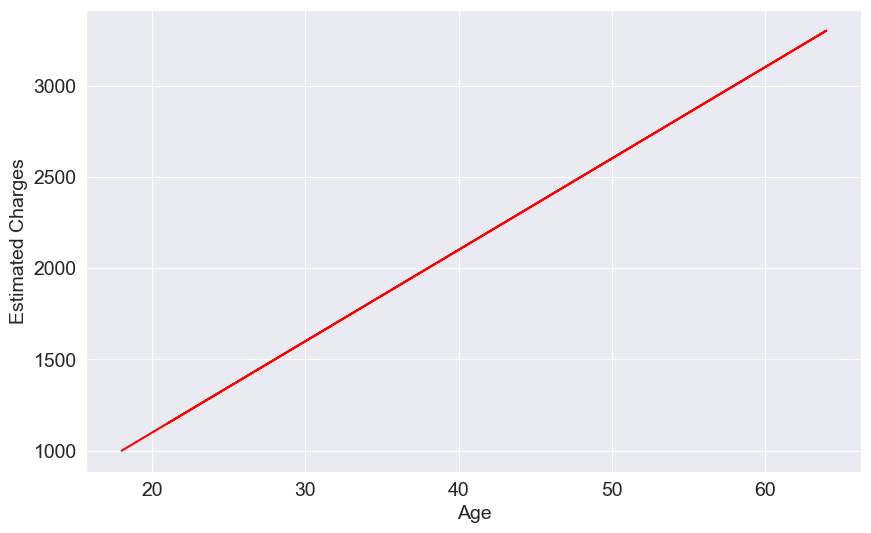

In [16]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

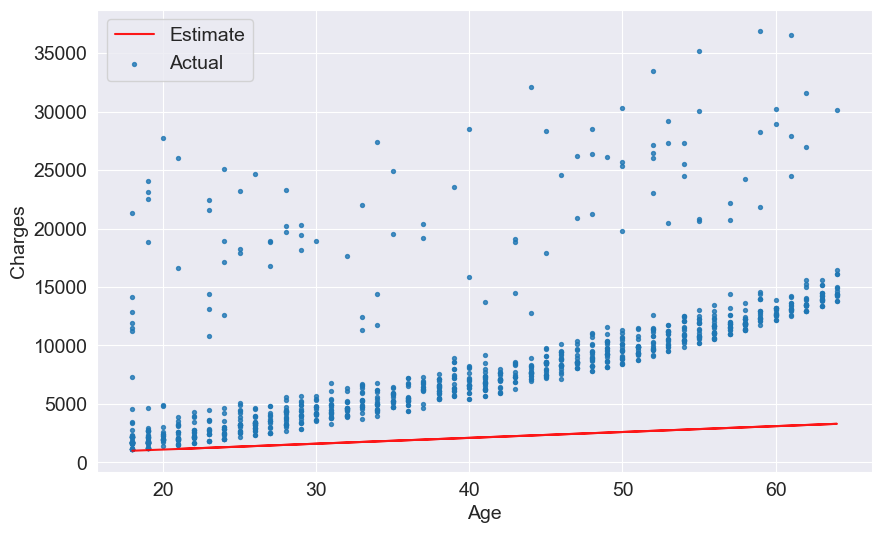

In [17]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r-', alpha=0.9)

plt.scatter(ages, target, s=8, alpha =0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [18]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b) 

    plt.plot(ages, estimated_charges, 'r', alpha =0.9)
    plt.scatter(ages, target, s =8, alpha =0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

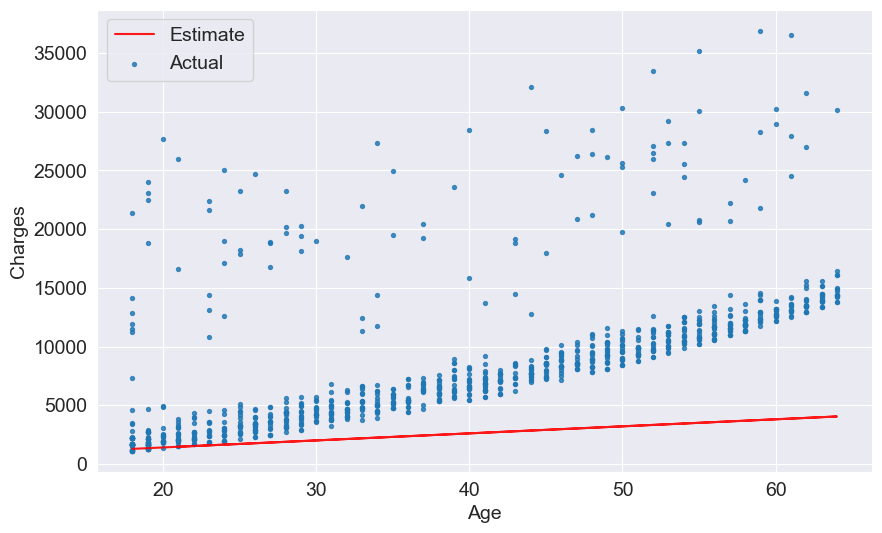

In [19]:
try_parameters(60, 200)

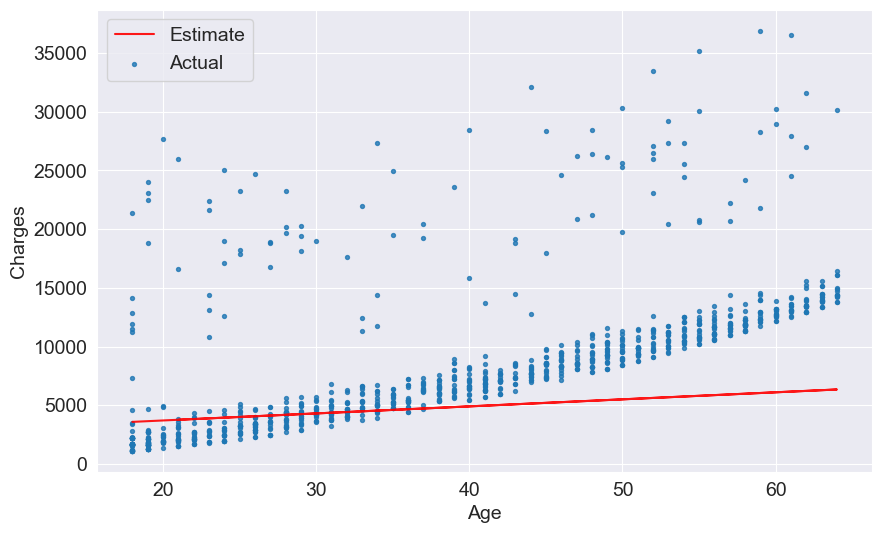

In [20]:
try_parameters(60, 2500)

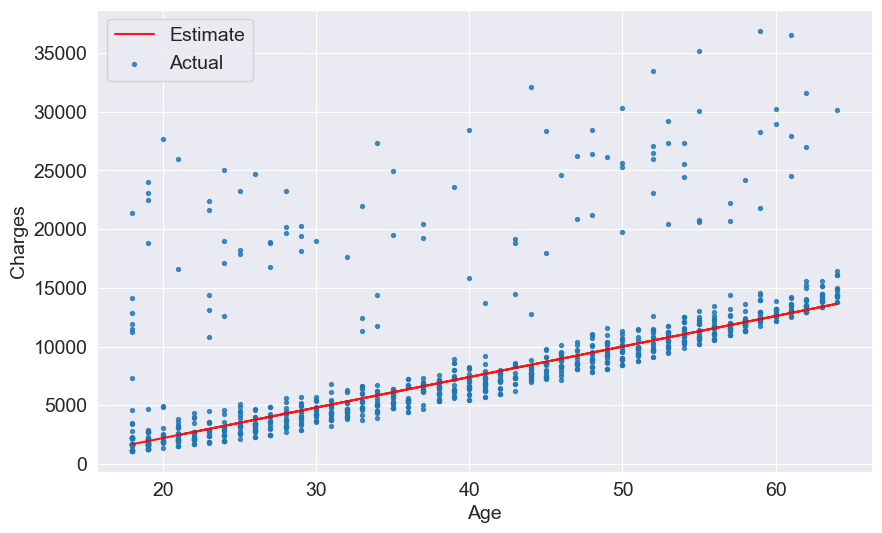

In [21]:
try_parameters(260, -3000)

In [22]:
#RMSE đo khoảng cách trung bình giữa giá trị dự đoán và giá trị thực tế (càng nhỏ mô hình càng chính xác)
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))


In [23]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [24]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [25]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha =0.9)
    plt.scatter(ages, target, s=8 , alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rmse(target, predictions)
    print('RMSE LOSS: ', loss)

RMSE LOSS:  4814.062765074937


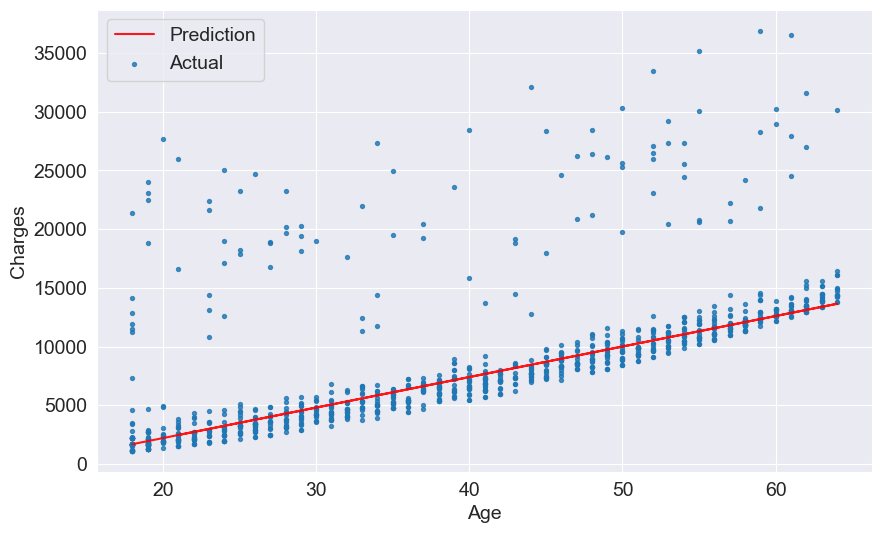

In [26]:
try_parameters(260, -3000)

In [27]:
model = LinearRegression() #Khởi tạo 1 mô hình mới từ thư viện scikit learn
#Lúc này mô hình chưa học gì, chưa có hệ số w, b (chưa được fit) và sẵn sàng được bạn huấn luyện bằng .fit()
# Mô hình này luôn học ra công thức tuyến tính: y=w.x +b

In [28]:
help(model.fit) #  fit(X,y, sample_weight (trọng số cho mỗi mô hình huấn luyện) = None)
"Là phương thức huấn luyện mô hình hồi quy tuyến tính bằng cách đưa vào dữ liệu đầu vào X và kết quả đầu ra y."
"Mô hình sẽ tìm ra hệ số phù hợp để mô tả mqh giữa X và y."
# help(): trả về cách dùng hàm trong nó

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



'Mô hình sẽ tìm ra hệ số phù hợp để mô tả mqh giữa X và y.'

In [29]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape: ', targets.shape)
# .shape: kiểm tra  số dòng và số cột(kích thước)

inputs.shape : (1064, 1)
targets.shape:  (1064,)


In [30]:
model.fit(inputs, targets)
# mô hình bắt đầu tìm ra các giá trị w và b bằng cách thử nhiều cặp w và b sao cho phù hợp dữ liệu thực tế nhất
# targets xấp xỉ w.ingputs + b

LinearRegression()

In [31]:
model.predict(np.array([[23],   
                        [37],   
                        [61]]))
#.predict(): dùng  để dự đoán dự báo đầu ra y từ đầu vào X sau khi bạn đã huấn luyện mô hình bằng fit()
#fit(X,y): mô hình học từ dữ liệu quá khứ
#.predict(X_mới) mô hình dự đoán tương lai hoặc trả lời đầu vào mới

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [32]:
predictions = model.predict(inputs)

In [33]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [34]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [35]:
# w
model.coef_

array([267.24891283])

In [36]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE LOSS:  4662.505766636395


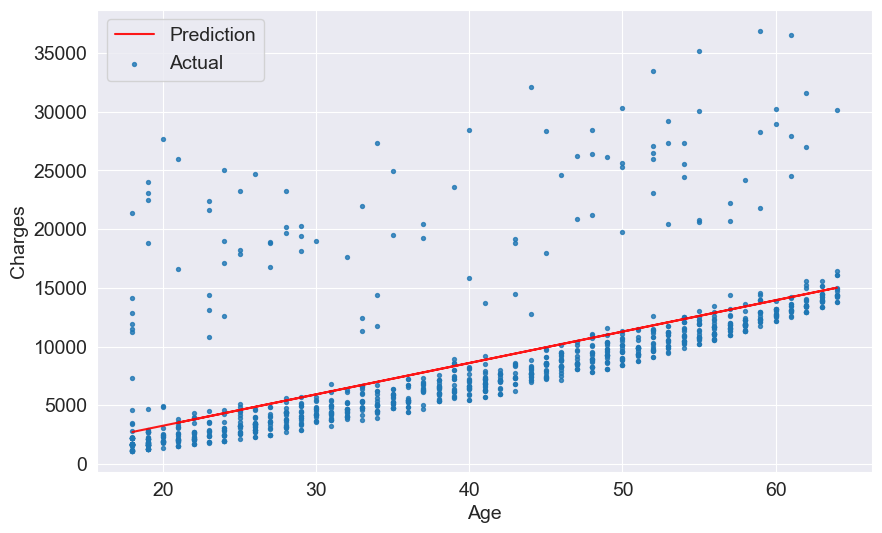

In [37]:
try_parameters(model.coef_, model.intercept_)

In [38]:
#Create inputs and targets 
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

#Create and train the model 
model = LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

# Compute los to evalute the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636395


In [39]:
#Linear Regession using Mulltiple Features 
#Create inputs and targets 
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

#Create and train the model 
model = LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

# Compute los to evalute the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


<Axes: xlabel='bmi', ylabel='charges'>

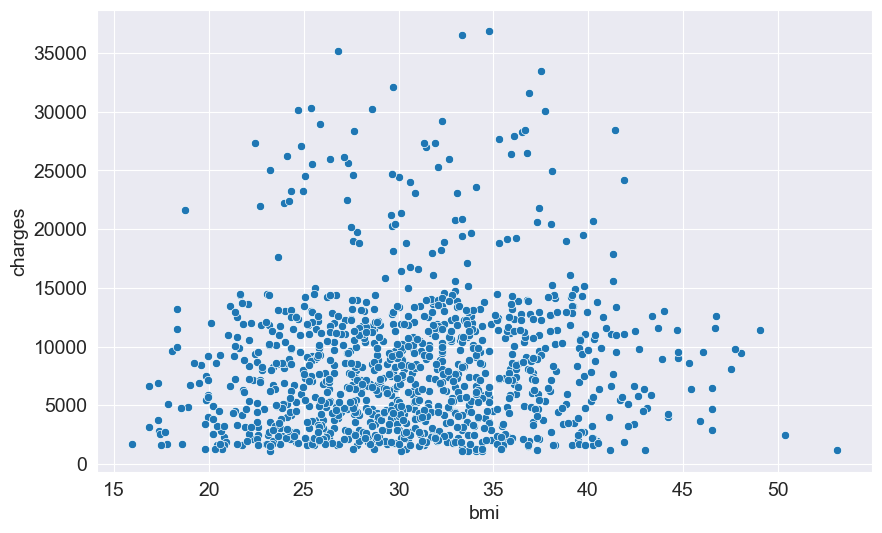

In [40]:

sns.scatterplot(data=non_smoker_df, x='bmi', y='charges')

In [41]:
#EXERCISE: chỉ sử dụng bmi để tính charges 
inputs = non_smoker_df[['bmi']]
targets = non_smoker_df['charges']
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
w = model.coef_
b= model.intercept_
rmse(targets, predictions)


np.float64(5969.772531913293)

In [42]:
def testbmi(w, b):
    bmi = non_smoker_df.bmi
    targets = non_smoker_df.charges
    predictions = model.predict(inputs)

    plt.plot(bmi, predictions)
    plt.scatter(bmi, targets, s=5, alpha =0.8)
    

    

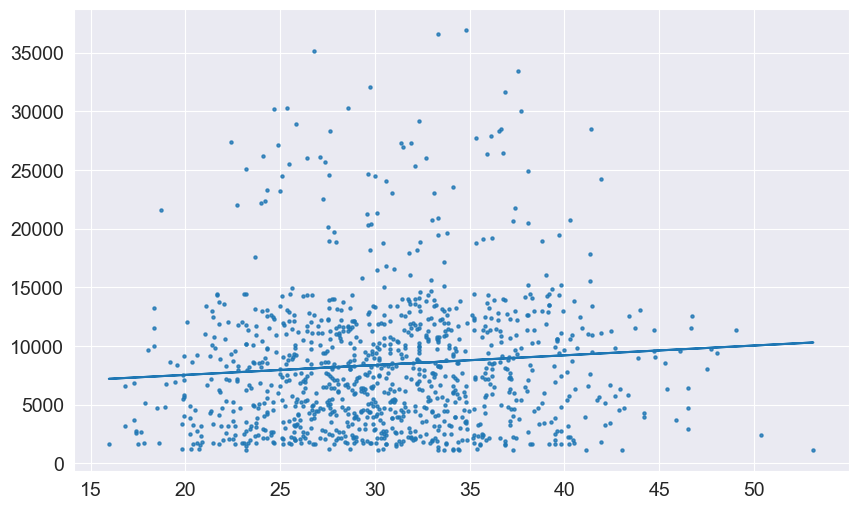

In [43]:
testbmi(model.coef_ , model.intercept_)

In [44]:
#Children
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [45]:
fig = px.strip(non_smoker_df, x='children', y='charges', title = "Children and Charges relationship")
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

In [46]:
inputs, targets=  non_smoker_df[['age', 'bmi', 'children']], non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print(loss)

4608.470405038246


In [47]:
#EXCERSISE làm cho người hút thuốc 
smoker_df = medical_df[medical_df['smoker']== 'yes']

In [48]:
smoker_df.select_dtypes(include= 'number').corr()

age       bmi  children   charges
age       1.000000  0.059674  0.081183  0.368224
bmi       0.059674  1.000000 -0.012619  0.806481
children  0.081183 -0.012619  1.000000  0.035945
charges   0.368224  0.806481  0.035945  1.000000

<Axes: >

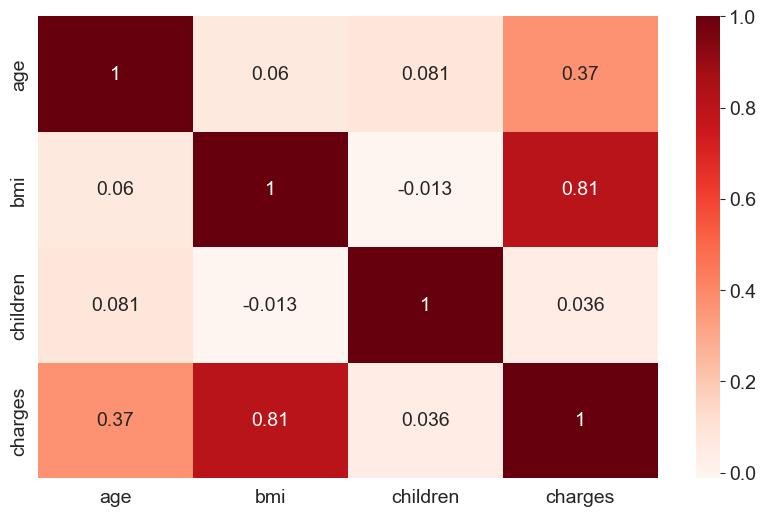

In [49]:
sns.heatmap(smoker_df.select_dtypes(include= 'number').corr(), cmap='Reds', annot= True)

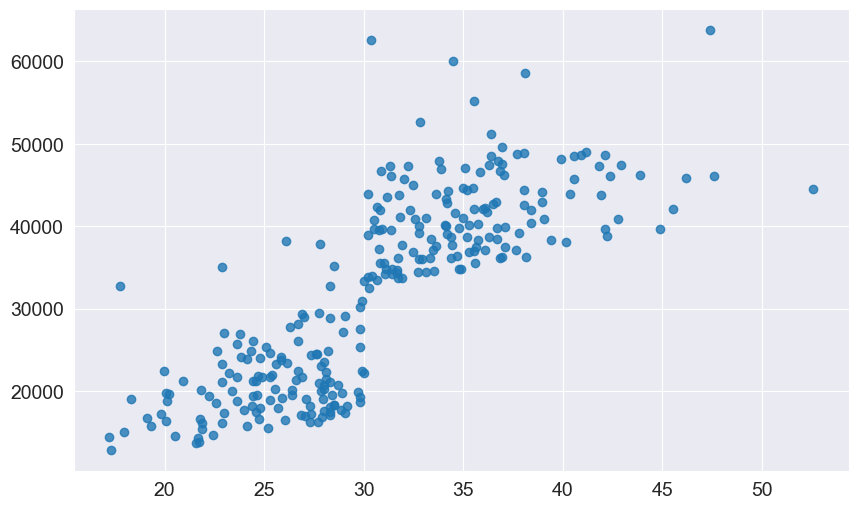

In [50]:
fig=plt.scatter(smoker_df['bmi'], smoker_df['charges'], alpha=0.8, marker= 'o')


In [51]:
inputs=  smoker_df[['bmi']]
targets= smoker_df['charges']
target = smoker_df.charges


In [52]:
def estimate_charges2(bmi, w, b):
    return w*bmi + b

In [53]:
def rmse2(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [54]:
model = LinearRegression()
model.fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse2(targets, predictions)
loss

np.float64(6811.59740830196)

In [55]:
def tryex(w, b):
    inputs = smoker_df[['bmi']]
    targets = smoker_df['charges']

    plt.plot(inputs, predictions, color ='red')
    plt.scatter(inputs, targets, color= 'blue', marker ='o', alpha=0.8)

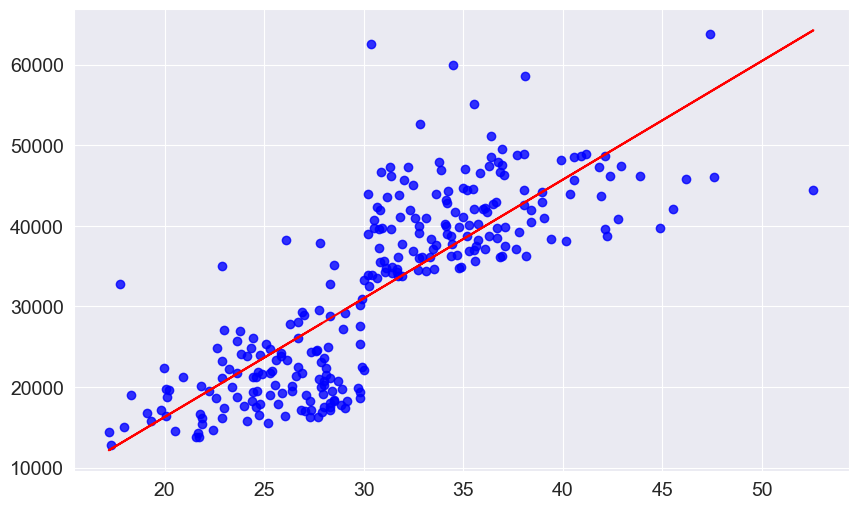

In [56]:
tryex(model.coef_, model.intercept_)

In [57]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [58]:
#all customer
inputs, targets = medical_df[['age','bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions= model.predict(inputs)
loss= rmse(targets, predictions)
print('Loss: ',loss)

Loss:  11355.317901125973


In [59]:
px.scatter(medical_df, x='age', y='charges', color= 'smoker')

In [60]:
#Using Categorical Features for Machine Learning : sử dụng các tính năng phân loại
"1. Phân loại nhị phân - Binary category: phân loại chỉ có 2 giá trị vd Nam/nữ"
"One-hot endcoding: nhiều hơn 2 giá trị vd màu sắc=[ĐỎ, XANH, VÀNG]" #vd: đỏ là 100, xanh là 010, vàng là 001
"Mã hóa thứ bậc - Ordinal encoding"
#vd "Rất không hài lòng" → 1  
# "Không hài lòng"     → 2  
# "Bình thường"        → 3  
# "Hài lòng"           → 4  
# "Rất hài lòng"       → 5


'Mã hóa thứ bậc - Ordinal encoding'

<Axes: xlabel='smoker', ylabel='charges'>

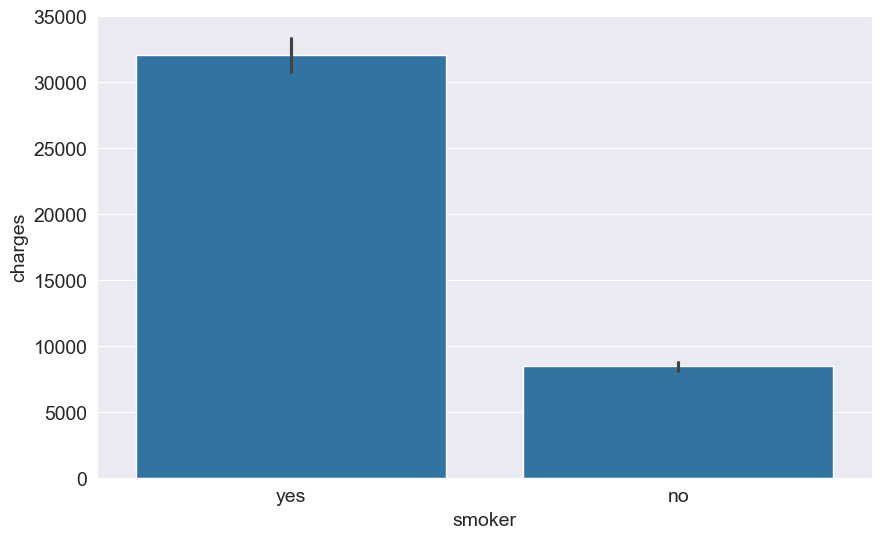

In [61]:
sns.barplot(data = medical_df, x='smoker', y='charges')



In [62]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [63]:
smoker_codes ={'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [64]:
medical_df

age     sex     bmi  children smoker     region      charges  smoker_code
0      19  female  27.900         0    yes  southwest  16884.92400            1
1      18    male  33.770         1     no  southeast   1725.55230            0
2      28    male  33.000         3     no  southeast   4449.46200            0
3      33    male  22.705         0     no  northwest  21984.47061            0
4      32    male  28.880         0     no  northwest   3866.85520            0
...   ...     ...     ...       ...    ...        ...          ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830            0
1334   18  female  31.920         0     no  northeast   2205.98080            0
1335   18  female  36.850         0     no  southeast   1629.83350            0
1336   21  female  25.800         0     no  southwest   2007.94500            0
1337   61  female  29.070         0    yes  northwest  29141.36030            1

[1338 rows x 8 columns]

In [65]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

In [66]:
medical_df

age     sex     bmi  children smoker     region      charges  smoker_code
0      19  female  27.900         0    yes  southwest  16884.92400            1
1      18    male  33.770         1     no  southeast   1725.55230            0
2      28    male  33.000         3     no  southeast   4449.46200            0
3      33    male  22.705         0     no  northwest  21984.47061            0
4      32    male  28.880         0     no  northwest   3866.85520            0
...   ...     ...     ...       ...    ...        ...          ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830            0
1334   18  female  31.920         0     no  northeast   2205.98080            0
1335   18  female  36.850         0     no  southeast   1629.83350            0
1336   21  female  25.800         0     no  southwest   2007.94500            0
1337   61  female  29.070         0    yes  northwest  29141.36030            1

[1338 rows x 8 columns]

In [67]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('loss:', loss)

loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

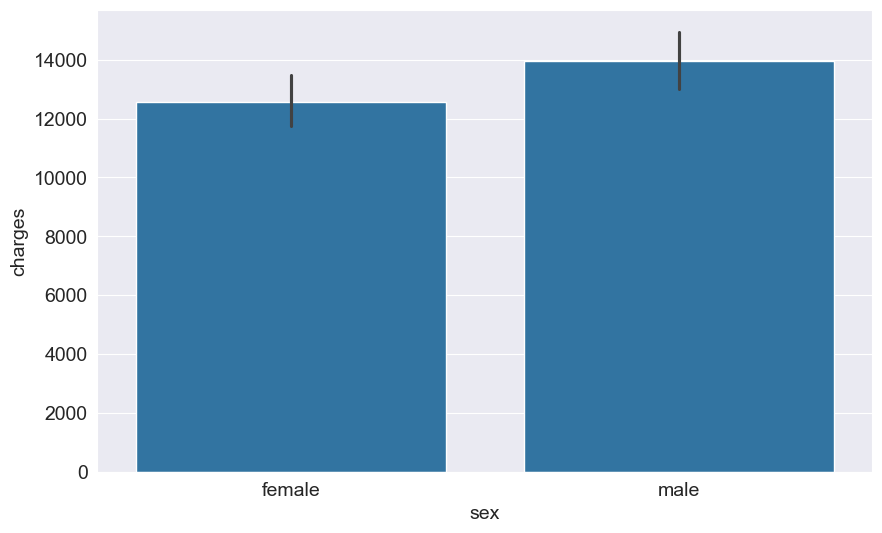

In [68]:
sns.barplot(medical_df, x='sex', y='charges')

In [69]:
medical_df


age     sex     bmi  children smoker     region      charges  smoker_code
0      19  female  27.900         0    yes  southwest  16884.92400            1
1      18    male  33.770         1     no  southeast   1725.55230            0
2      28    male  33.000         3     no  southeast   4449.46200            0
3      33    male  22.705         0     no  northwest  21984.47061            0
4      32    male  28.880         0     no  northwest   3866.85520            0
...   ...     ...     ...       ...    ...        ...          ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830            0
1334   18  female  31.920         0     no  northeast   2205.98080            0
1335   18  female  36.850         0     no  southeast   1629.83350            0
1336   21  female  25.800         0     no  southwest   2007.94500            0
1337   61  female  29.070         0    yes  northwest  29141.36030            1

[1338 rows x 8 columns]

In [70]:
sex_codes ={'male':1, 'female':0}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df

age     sex     bmi  children smoker     region      charges  smoker_code  sex_code
0      19  female  27.900         0    yes  southwest  16884.92400            1         0
1      18    male  33.770         1     no  southeast   1725.55230            0         1
2      28    male  33.000         3     no  southeast   4449.46200            0         1
3      33    male  22.705         0     no  northwest  21984.47061            0         1
4      32    male  28.880         0     no  northwest   3866.85520            0         1
...   ...     ...     ...       ...    ...        ...          ...          ...       ...
1333   50    male  30.970         3     no  northwest  10600.54830            0         1
1334   18  female  31.920         0     no  northeast   2205.98080            0         0
1335   18  female  36.850         0     no  southeast   1629.83350            0         0
1336   21  female  25.800         0     no  southwest   2007.94500            0         0
1337   61  female  29.070         0    yes  northwest  29141.36030            1         0

[1338 rows x 9 columns]

In [71]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202533)

In [72]:
inputs, targets = medical_df[['sex_code','bmi','age','children','smoker_code']], medical_df['charges']
model= LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets , predictions)
loss

np.float64(6056.100708754546)

<Axes: xlabel='region', ylabel='charges'>

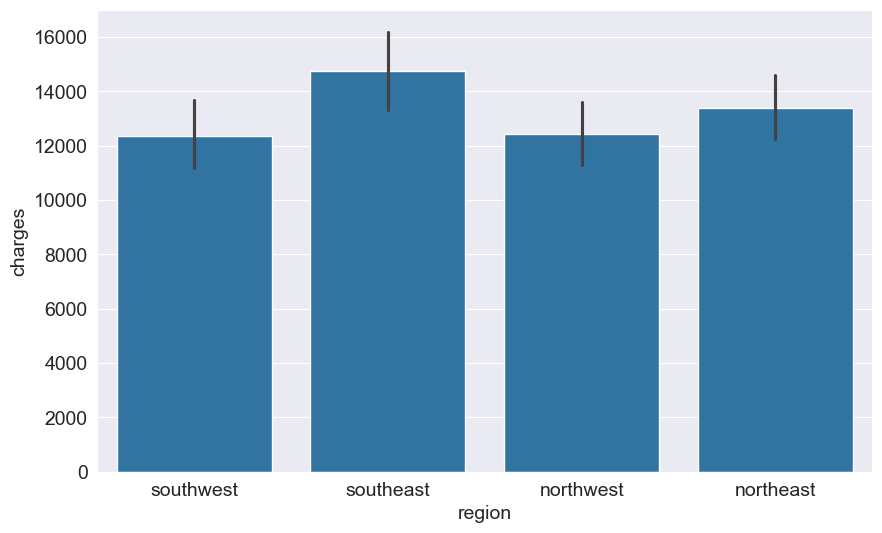

In [73]:
sns.barplot(data= medical_df, x='region', y='charges')


In [74]:
from sklearn import preprocessing #modul con chứa các công cụ chuẩn hóa, biển đổi dữ liệu (scaling, encoding, v.v.)
enc =preprocessing.OneHotEncoder() #biến đổi các cột dạng categorical thành ma trận one-hot
enc.fit(medical_df[['region']])
enc.categories_ #list gồm một mảng Numpy cho mỗi cột đã fit


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [75]:
enc.transform([['northeast'], ['northwest']]).toarray()

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [76]:
one_hot = enc.transform(medical_df[['region']]).toarray() # đổi dữ liệu 
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [77]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [78]:
medical_df

age     sex     bmi  children smoker     region      charges  smoker_code  sex_code  northeast  northwest  southeast  southwest
0      19  female  27.900         0    yes  southwest  16884.92400            1         0        0.0        0.0        0.0        1.0
1      18    male  33.770         1     no  southeast   1725.55230            0         1        0.0        0.0        1.0        0.0
2      28    male  33.000         3     no  southeast   4449.46200            0         1        0.0        0.0        1.0        0.0
3      33    male  22.705         0     no  northwest  21984.47061            0         1        0.0        1.0        0.0        0.0
4      32    male  28.880         0     no  northwest   3866.85520            0         1        0.0        1.0        0.0        0.0
...   ...     ...     ...       ...    ...        ...          ...          ...       ...        ...        ...        ...        ...
1333   50    male  30.970         3     no  northwest  10600.54830            0         1        0.0        1.0        0.0        0.0
1334   18  female  31.920         0     no  northeast   2205.98080            0         0        1.0        0.0        0.0        0.0
1335   18  female  36.850         0     no  southeast   1629.83350            0         0        0.0        0.0        1.0        0.0
1336   21  female  25.800         0     no  southwest   2007.94500            0         0        0.0        0.0        0.0        1.0
1337   61  female  29.070         0    yes  northwest  29141.36030            1         0        0.0        1.0        0.0        0.0

[1338 rows x 13 columns]

In [79]:
input_cols = ['age','bmi', 'children', 'smoker_code', 'sex_code', 'northeast'
              ,'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss =rmse(targets, predictions)
print('loss', loss)

loss 6041.6796511744515


In [80]:
weights_df =pd.DataFrame({
    'feature': np.append(input_cols , 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

In [81]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler() #kỹ thuật chuẩn hóa bằng cách đưa các giá trị 
#về với 1 giá trị là z = (x-u)/omega với x: giá trị gốc, u: trung bình(mean), omega: độ lệch chuẩn, z: giá trị mới sau khi chuẩn hóa
scaler.fit(medical_df[numeric_cols])# tính ra scaler.mean_ , scaler.var_, scaler.scale_ nhưng là khi các giá trị vẫn chưa được chuẩn hóa về z

StandardScaler()

In [82]:
scaler.mean_ #giá trị trung bình

array([39.20702541, 30.66339686,  1.09491779])

In [83]:
scaler.var_ #variance: phương sai: giống như độ lệch chuẩn nhưng không lấy căn bật 2

array([197.25385199,  37.16008997,   1.45212664])

In [84]:
medical_df[numeric_cols]

age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]

In [85]:
scaled_inputs =  scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [86]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values #.values: trả về NumPy array chứa các giá trị, thay vì dataFrame
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]], shape=(1338, 6))

In [87]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1) # concentenate là hàm dùng để thêm dòng nếu axis =0 và cột nếu axis = 1
targets = medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss =rmse(targets, predictions)
print('loss', loss)
print(predictions)

loss 6041.679651174452
[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]


In [88]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending = False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

In [89]:
new_customers = [[28 ,30, 2, 1, 0, 0, 1, 0, 0]]
scaler.transform([[28 ,30, 2,]])


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [90]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])

In [91]:
#HOW TO APPROACH A MACHINE LEARNING PROBLEM
"""
1: khám phá dữ liệu và tìm ra mối tương quan khác nhau giữa dữ liệu đầu vào và mục tiêu
(Explore and data and find correlations between inputs and targets)
- đọc và hiểu dữ liệu (data exploration)
- dùng thống kê và biểu đồ để xem:
    + cột nào có ảnh hưởng đến target
    + có thiếu dữ liệu không ?
    + các mối quan hệ tiềm năng vd: hút thuốc --> chi phí

2: Chọn mô hình, hàm mất mát và bộ tối ưu phù hợp
(Pick the right model, loss functions and optimizer for the problem at hand)
vd: hồi quy tuyến tính --> dự đoán số liên tục (giá nhà, chi phí)
    phân loại --> nếu đàu ra là nhãn
- Chọn hàm mất mát: MSE, RMSE, cross-entropy ,v.v
- Chọn bộ tối ưu (NẾU DÙNG DEEP LEARNING): SGD, Adam...
3: Chuẩn hóa biến số và mã hóa biến phân loại
(Scale numeric variable and one-hot encode categorical data)
- Biến số (tuổi, BMI...) -> chuẩn hóa bằng StandardScaler, MinMaxScaler
- Biến phân loại (giới tính, vùng miền...)-> dùng:
    + Lable Encoding
    + One-hot Encoding
4.Tách tập kiểm tra(test set)
(Set aside a test set (using a fraction of the trainning set))
- Không dùng toàn bộ dữ liệu để train
-Dành ra một phần (ví dụ 20%) để kiểm tra mô hình
5. Huấn luyện mô hình (training)
- dùng tập huấn luyện (X_train, y_train)
- Mô hình học để tối ưu trọng số
6. Dự đoán trên tập kiểm tra và tính sai số
- Mô hình dự đoán trên X_test 
- So sánh với y_test để tính sai số
- Dùng RMSE, MAE, Accuracy ,v.v

"""


'\n1: khám phá dữ liệu và tìm ra mối tương quan khác nhau giữa dữ liệu đầu vào và mục tiêu\n(Explore and data and find correlations between inputs and targets)\n- đọc và hiểu dữ liệu (data exploration)\n- dùng thống kê và biểu đồ để xem:\n    + cột nào có ảnh hưởng đến target\n    + có thiếu dữ liệu không ?\n    + các mối quan hệ tiềm năng vd: hút thuốc --> chi phí\n\n2: Chọn mô hình, hàm mất mát và bộ tối ưu phù hợp\n(Pick the right model, loss functions and optimizer for the problem at hand)\nvd: hồi quy tuyến tính --> dự đoán số liên tục (giá nhà, chi phí)\n    phân loại --> nếu đàu ra là nhãn\n- Chọn hàm mất mát: MSE, RMSE, cross-entropy ,v.v\n- Chọn bộ tối ưu (NẾU DÙNG DEEP LEARNING): SGD, Adam...\n3: Chuẩn hóa biến số và mã hóa biến phân loại\n(Scale numeric variable and one-hot encode categorical data)\n- Biến số (tuổi, BMI...) -> chuẩn hóa bằng StandardScaler, MinMaxScaler\n- Biến phân loại (giới tính, vùng miền...)-> dùng:\n    + Lable Encoding\n    + One-hot Encoding\n4.Tách 

In [92]:
# Creating a Test Set
from sklearn.model_selection import train_test_split
""" train_test_spilit: dùng để tách dữ liệu thành 2 phần
- tập huấn luyện (training set): để mô hình học
- tập kiểm tra (test set): để đánh giá độ chính xác của mô hình với dữ liệu chưa thấy
"""


' train_test_spilit: dùng để tách dữ liệu thành 2 phần\n- tập huấn luyện (training set): để mô hình học\n- tập kiểm tra (test set): để đánh giá độ chính xác của mô hình với dữ liệu chưa thấy\n'

In [93]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size= 0.1)
""" cú pháp của train_test_spilit :
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None
)
X: dữ liệu đầu vào (features) vd: inputs
y: Nhãn (targets) vd: charges
test_size : tỷ lệ dữ liệu dành cho tập kiểm tra (test set): vd 0.2 nghĩa là 20% dữ liệu
train_size: tỷ lệ dữ liệu dành cho tập huấn luyện (Nếu không ghi thì sẽ là 1 -testsize)
ramdom_state: đảm bảo kết quả  chia dữ liệu lặp lại được
shuffle: có xáo trộn dữ liệu trước khi chia hay không ( thường nên là True)
stratify: dùng để đảm bảo tỷ lệ phân bố label đồng đều giữa train và test (thường dùng với phân loại - classsification)
"""

' cú pháp của train_test_spilit :\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y,\n    test_size=0.2,\n    train_size=None,\n    random_state=None,\n    shuffle=True,\n    stratify=None\n)\nX: dữ liệu đầu vào (features) vd: inputs\ny: Nhãn (targets) vd: charges\ntest_size : tỷ lệ dữ liệu dành cho tập kiểm tra (test set): vd 0.2 nghĩa là 20% dữ liệu\ntrain_size: tỷ lệ dữ liệu dành cho tập huấn luyện (Nếu không ghi thì sẽ là 1 -testsize)\nramdom_state: đảm bảo kết quả  chia dữ liệu lặp lại được\nshuffle: có xáo trộn dữ liệu trước khi chia hay không ( thường nên là True)\nstratify: dùng để đảm bảo tỷ lệ phân bố label đồng đều giữa train và test (thường dùng với phân loại - classsification)\n'

In [94]:
model = LinearRegression().fit(inputs_train, targets_train)
predictions_test = model.predict(inputs_test)
loss= rmse(targets_test, predictions_test)
print('Test Loss:', loss)


Test Loss: 5022.033326727581


In [95]:
predictions_train = model.predict(inputs_train)
loss = rmse(targets_train, predictions_train)
print('Train Loss', loss)


Train Loss 6146.43551893877


In [96]:
# --> điểm số trên tập kiểm tra hoặc mức tổn thất trên tập Test set sẽ luôn cao hơn Train set


In [97]:
#Logistic Regression with Scikit Learn - Machine Learning with Python
#dùng để dự đoán nhãn phân loại: đậu/ rớt, bệnh/ không bệnh
# còn hồi quy tuyến tính: dự đoán giá trị liên tục: giá nhà, giá xe, chiều cao, thu nhập
# hàm sigmoid (0,1): - nếu y>= 0.5 thì dự đoán là 1 và nếu y <0.5 thì dự đoán là 0
"giống với Linear Regression nhưng có thêm 1 bước là đưa qua hàm kích hoạt gọi là Sigma hoặc sigmoid rồi mới đưa ra kết quả"
"chức năng của hàm sigmoid là lấy kết quả của tổ hợp tuyến tính này và nén nó trong phạm vi từ 0 đến 1"
" hàm sigma (0-1) này được suy ra là xác suất của lớp mà chúng ta đang cố gắng dự đoán"
"""
hàm này hoặt động:
lấy dự đoán của mô hình so sánh với dữ liệu thực tế 
--> có câu trả lời là có hoặc không
và chúng ta lấy các dự đoán, tức là xác suất và đưa chúng vào hàm mất mát này
--> gọi là entropy chéo
chạy nó thông qua thuật toán tối ưu (như phương pháp giảm dần RMSE như trên)
--> thay đổi trọng số để mô hình hoạt động tốt nhất

"""

'\nhàm này hoặt động:\nlấy dự đoán của mô hình so sánh với dữ liệu thực tế \n--> có câu trả lời là có hoặc không\nvà chúng ta lấy các dự đoán, tức là xác suất và đưa chúng vào hàm mất mát này\n--> gọi là entropy chéo\nchạy nó thông qua thuật toán tối ưu (như phương pháp giảm dần RMSE như trên)\n--> thay đổi trọng số để mô hình hoạt động tốt nhất\n\n'

In [98]:
raw_df=pd.read_csv(r"C:\Users\ADMIN\Downloads\weatherAUS.csv\weatherAUS.csv")


In [99]:
raw_df


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN           W           44.0          W        WNW          20.0          24.0   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN         WNW           44.0        NNW        WSW           4.0          22.0   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN         WSW           46.0          W        WSW          19.0          26.0   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN          NE           24.0         SE          E          11.0           9.0   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN           W           41.0        ENE         NW           7.0          20.0   
...            ...      ...      ...      ...       ...          ...       ...         ...            ...        ...        ...           ...           ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN           E           31.0         SE        ENE          13.0          11.0   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN         NNW           22.0         SE          N          13.0           9.0   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN           N           37.0         SE        WNW           9.0           9.0   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN          SE           28.0        SSE          N          13.0           7.0   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN         NaN            NaN        ESE        ESE          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0              71.0         22.0       1007.7       1007.1       8.0       NaN     16.9     21.8        No           No  
1              44.0         25.0       1010.6       1007.8       NaN       NaN     17.2     24.3        No           No  
2              38.0         30.0       1007.6       1008.7       NaN       2.0     21.0     23.2        No           No  
3              45.0         16.0       1017.6       1012.8       NaN       NaN     18.1     26.5        No           No  
4              82.0         33.0       1010.8       1006.0       7.0       8.0     17.8     29.7        No           No  
...             ...          ...          ...          ...       ...       ...      ...      ...       ...          ...  
145455         51.0         24.0       1024.6       1020.3       NaN       NaN     10.1     22.4        No           No  
145456         56.0         21.0       1023.5       1019.1       NaN       NaN     10.9     24.5        No           No  
145457         53.0         24.0       1021.0       1016.8       NaN       NaN     12.5     26.1        No           No  
145458         51.0         24.0       1019.4       1016.5       3.0       2.0     15.1     26.0        No           No  
145459         62.0         36.0       1020.2       1017.9       8.0       8.0     15.0     20.9        No          NaN  

[145460 rows x 23 columns]

In [100]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [101]:
raw_df.dropna(subset= ['RainToday', 'RainTomorrow'], inplace= True)

In [102]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [103]:
#Exploratory Data Analysis and Visualization


In [104]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'


In [105]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN           W           44.0          W        WNW          20.0          24.0   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN         WNW           44.0        NNW        WSW           4.0          22.0   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN         WSW           46.0          W        WSW          19.0          26.0   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN          NE           24.0         SE          E          11.0           9.0   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN           W           41.0        ENE         NW           7.0          20.0   
...            ...      ...      ...      ...       ...          ...       ...         ...            ...        ...        ...           ...           ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN       NaN           E           31.0        ESE          E          15.0          13.0   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN           E           31.0         SE        ENE          13.0          11.0   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN         NNW           22.0         SE          N          13.0           9.0   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN           N           37.0         SE        WNW           9.0           9.0   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN          SE           28.0        SSE          N          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0              71.0         22.0       1007.7       1007.1       8.0       NaN     16.9     21.8        No           No  
1              44.0         25.0       1010.6       1007.8       NaN       NaN     17.2     24.3        No           No  
2              38.0         30.0       1007.6       1008.7       NaN       2.0     21.0     23.2        No           No  
3              45.0         16.0       1017.6       1012.8       NaN       NaN     18.1     26.5        No           No  
4              82.0         33.0       1010.8       1006.0       7.0       8.0     17.8     29.7        No           No  
...             ...          ...          ...          ...       ...       ...      ...      ...       ...          ...  
145454         59.0         27.0       1024.7       1021.2       NaN       NaN      9.4     20.9        No           No  
145455         51.0         24.0       1024.6       1020.3       NaN       NaN     10.1     22.4        No           No  
145456         56.0         21.0       1023.5       1019.1       NaN       NaN     10.9     24.5        No           No  
145457         53.0         24.0       1021.0       1016.8       NaN       NaN     12.5     26.1        No           No  
145458         51.0         24.0       1019.4       1016.5       3.0       2.0     15.1     26.0        No           No  

[140787 rows x 23 columns]

In [106]:
px.histogram(raw_df, x='Location', title= 'Location vs Rainy Days', color = 'RainToday' )

In [107]:
px.histogram(raw_df, x='Temp3pm', title= 'Temperature at 3 pm vs Rain Tomorrow', color = 'RainTomorrow')

In [108]:
px.histogram(raw_df,
             x='RainTomorrow',
             color = 'RainToday',
             title='Rain Tomorrow vs Rain Today')
#--> nếu hôm nay không mưa thì khả năng cao ngày mai cũng không mưa
#--> nếu hôm nay mưa thì tỉ lệ mai mưa và không mưa khoảng 50-50

In [109]:
px.scatter(raw_df.sample(2000),
           title = 'Min Temp vs Max Temp',
           x='MinTemp',
           y='MaxTemp',
           color= 'RainToday')

In [110]:
px.strip(raw_df.sample(1500),
         title= 'Temp (3pm) vs Humidity (3pm)',
         x='Temp3pm',
         y='Humidity3pm',
         color= 'RainTomorrow'
        )

In [111]:
#Chọn Sample
use_sample = False #Nếu là True thì sẽ dùng sample còn False thì là không

In [112]:
Sample_fraction = 0.1

In [113]:
if use_sample:
    raw_df = raw_df.sample(frac= Sample_fraction).copy()

In [114]:
# Chọn kích cỡ Testset, TrainingSet, ValidationSet
""" Nếu kích cỡ bộ data khoảng hàng trăm ngàn dòng: 60-20-20
Nếu kích cỡ bộ data khoảng hàng triệu dòng: 75-25 (25 này là gồm test và validation )
"""

' Nếu kích cỡ bộ data khoảng hàng trăm ngàn dòng: 60-20-20\nNếu kích cỡ bộ data khoảng hàng triệu dòng: 75-25 (25 này là gồm test và validation )\n'

In [115]:
train_val_df, test_df =train_test_split(raw_df, test_size= 0.2, random_state= 42)
train_df, val_df = train_test_split(train_val_df, test_size= 0.25, random_state= 42)
# random_state=42 giúp cho những lần chia data đều là giống nhau

In [116]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (84471, 23)
val_df.shape: (28158, 23)
test_df.shape: (28158, 23)


In [117]:
#lưu ý trong việc chọn test,train,validation set là:
# dữ liệu dùng để train nên là dữ liệu cũ hơn dữ liệu dùng để test và validation


<Axes: title={'center': 'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

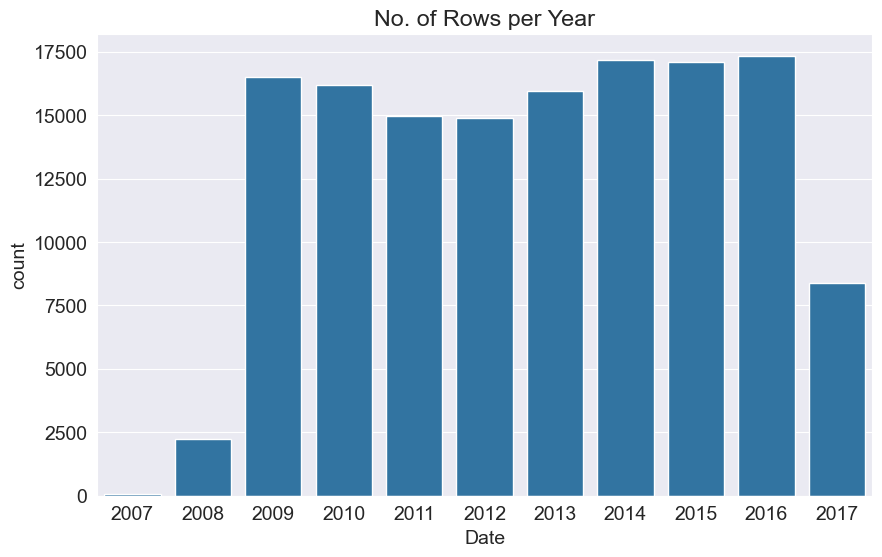

In [118]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [119]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year== 2015]
test_df = raw_df[year >2015]


In [120]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (97988, 23)
val_df.shape: (17089, 23)
test_df.shape: (25710, 23)


In [121]:
# nếu không có thời gian: chọn ngẫu nhiên 60 20 20
# nếu có thời gian: chia theo năm trước và sau 


In [122]:
input_cols = list(train_df.columns)[1:-1] # loại bỏ cột date và cột mục tiêu
target_cols ='RainTomorrow' #[start:stop]  →  lấy từ vị trí `start` đến **trước** vị trí `stop`


In [123]:
input_cols1 = list(val_df.columns)[1:-1]
input_cols2 = list(test_df.columns)[1:-1]

In [124]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [125]:
val_inputs = val_df[input_cols1].copy()
val_targets = val_df[target_cols].copy()

In [126]:
test_inputs = test_df[input_cols1].copy()
test_targets = test_df[target_cols].copy()

In [127]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [128]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0        Albury     13.4     22.9       0.6          NaN       NaN           W           44.0          W        WNW          20.0          24.0         71.0   
1        Albury      7.4     25.1       0.0          NaN       NaN         WNW           44.0        NNW        WSW           4.0          22.0         44.0   
2        Albury     12.9     25.7       0.0          NaN       NaN         WSW           46.0          W        WSW          19.0          26.0         38.0   
3        Albury      9.2     28.0       0.0          NaN       NaN          NE           24.0         SE          E          11.0           9.0         45.0   
4        Albury     17.5     32.3       1.0          NaN       NaN           W           41.0        ENE         NW           7.0          20.0         82.0   
...         ...      ...      ...       ...          ...       ...         ...            ...        ...        ...           ...           ...          ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN         SSE           43.0        ESE        SSE          24.0          26.0         22.0   
144549    Uluru     15.1     36.8       0.0          NaN       NaN          NE           31.0        ENE         SW          19.0          20.0         16.0   
144550    Uluru     17.3     37.8       0.0          NaN       NaN         ESE           39.0        ESE        SSE          26.0           9.0         15.0   
144551    Uluru     20.1     38.5       0.0          NaN       NaN         ESE           43.0        ESE        SSW          28.0          17.0         22.0   
144552    Uluru     22.5     39.6       0.0          NaN       NaN         WNW           76.0        ENE        SSW          30.0          13.0         16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
0              22.0       1007.7       1007.1       8.0       NaN     16.9     21.8        No  
1              25.0       1010.6       1007.8       NaN       NaN     17.2     24.3        No  
2              30.0       1007.6       1008.7       NaN       2.0     21.0     23.2        No  
3              16.0       1017.6       1012.8       NaN       NaN     18.1     26.5        No  
4              33.0       1010.8       1006.0       7.0       8.0     17.8     29.7        No  
...             ...          ...          ...       ...       ...      ...      ...       ...  
144548         13.0       1014.1       1009.8       NaN       NaN     23.7     31.8        No  
144549          8.0       1012.6       1007.6       NaN       NaN     28.9     34.8        No  
144550          8.0       1011.9       1008.0       NaN       NaN     29.7     35.7        No  
144551          9.0       1014.0       1009.2       NaN       NaN     29.8     37.2        No  
144552          9.0       1012.1       1006.2       NaN       NaN     30.1     37.4        No  

[97988 rows x 21 columns]

In [129]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [130]:
numeric_cols1 = val_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols1 = val_inputs.select_dtypes('object').columns.tolist()

In [131]:
numeric_cols2 = test_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols2 = test_inputs.select_dtypes('object').columns.tolist()

In [132]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [133]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000  88876.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004      40.215873     14.092263     18.764608     68.628745     51.469547   1017.513734   
std        6.347175      6.984397      8.518819      3.952010      3.788813      13.697967      8.984203      8.872398     19.003097     20.756113      7.072510   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000       6.000000      0.000000      0.000000      0.000000      0.000000    980.500000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000      31.000000      7.000000     13.000000     57.000000     37.000000   1012.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000      39.000000     13.000000     19.000000     70.000000     52.000000   1017.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000      48.000000     19.000000     24.000000     83.000000     66.000000   1022.300000   
max       33.900000     48.100000    371.000000     82.400000     14.300000     135.000000     87.000000     87.000000    100.000000    100.000000   1041.000000   

        Pressure3pm      Cloud9am      Cloud3pm       Temp9am       Temp3pm  
count  88857.000000  63000.000000  61966.000000  97414.000000  97392.000000  
mean    1015.132352      4.302952      4.410677     16.835126     21.540138  
std        6.997072      2.866634      2.693370      6.404586      6.831612  
min      979.000000      0.000000      0.000000     -5.900000     -5.100000  
25%     1010.400000      1.000000      2.000000     12.200000     16.600000  
50%     1015.100000      5.000000      5.000000     16.600000     20.900000  
75%     1019.900000      7.000000      7.000000     21.400000     26.200000  
max     1039.600000      9.000000      9.000000     40.200000     46.100000

In [134]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [135]:
#Imputing Missing Numeric Data
from sklearn.impute import SimpleImputer

In [136]:
imputer = SimpleImputer(strategy= 'mean') # Xử lí các ô bị thiếu (NaN) thay bằng giá trị 'mean' của cột đó


In [137]:
raw_df[numeric_cols].isna().sum() # tổng số ô bị thiếu cho từng cột 


MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [138]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [139]:
imputer.fit(raw_df[numeric_cols])


SimpleImputer()

In [140]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [141]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          13.4     22.9       0.6          NaN       NaN           44.0          20.0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1           7.4     25.1       0.0          NaN       NaN           44.0           4.0          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          12.9     25.7       0.0          NaN       NaN           46.0          19.0          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.2     28.0       0.0          NaN       NaN           24.0          11.0           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          17.5     32.3       1.0          NaN       NaN           41.0           7.0          20.0         82.0         33.0       1010.8       1006.0       7.0   
...         ...      ...       ...          ...       ...            ...           ...           ...          ...          ...          ...          ...       ...   
144548     16.9     33.2       0.0          NaN       NaN           43.0          24.0          26.0         22.0         13.0       1014.1       1009.8       NaN   
144549     15.1     36.8       0.0          NaN       NaN           31.0          19.0          20.0         16.0          8.0       1012.6       1007.6       NaN   
144550     17.3     37.8       0.0          NaN       NaN           39.0          26.0           9.0         15.0          8.0       1011.9       1008.0       NaN   
144551     20.1     38.5       0.0          NaN       NaN           43.0          28.0          17.0         22.0          9.0       1014.0       1009.2       NaN   
144552     22.5     39.6       0.0          NaN       NaN           76.0          30.0          13.0         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  
0            NaN     16.9     21.8  
1            NaN     17.2     24.3  
2            2.0     21.0     23.2  
3            NaN     18.1     26.5  
4            8.0     17.8     29.7  
...          ...      ...      ...  
144548       NaN     23.7     31.8  
144549       NaN     28.9     34.8  
144550       NaN     29.7     35.7  
144551       NaN     29.8     37.2  
144552       NaN     30.1     37.4  

[97988 rows x 16 columns]

In [142]:
imputer.transform(train_inputs[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]], shape=(97988, 16))

In [143]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])



In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler = MinMaxScaler()

In [146]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [147]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [148]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

In [149]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [150]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366       0.265107      0.108395      0.215668      0.686309      0.514693      0.612014   
std        0.149458      0.131904      0.022962      0.021628      0.200931       0.102420      0.068800      0.101424      0.189008      0.206376      0.111335   
min        0.000000      0.013233      0.000000      0.000000      0.000000       0.000000      0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241       0.193798      0.053846      0.149425      0.570000      0.370000      0.543802   
50%        0.478774      0.514178      0.000000      0.037741      0.526244       0.255814      0.100000      0.218391      0.690000      0.520000      0.614125   
75%        0.591981      0.618147      0.002156      0.038621      0.634483       0.310078      0.146154      0.275862      0.830000      0.650000      0.682645   
max        1.000000      1.000000      1.000000      0.568276      0.986207       1.000000      0.669231      1.000000      1.000000      1.000000      1.000000   

        Pressure3pm      Cloud9am      Cloud3pm       Temp9am       Temp3pm  
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000  
mean       0.608705      0.483192      0.493693      0.507089      0.517103  
std        0.106611      0.255486      0.238028      0.134722      0.130726  
min        0.030400      0.000000      0.000000      0.027426      0.005758  
25%        0.540800      0.333333      0.333333      0.409283      0.422265  
50%        0.610527      0.492351      0.499917      0.502110      0.506718  
75%        0.675200      0.666667      0.666667      0.601266      0.604607  
max        1.000000      1.000000      1.000000      1.000000      0.988484

In [151]:
train_inputs[numeric_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574      0.153846      0.275862         0.71         0.22     0.449587       0.4800  0.888889   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574      0.030769      0.252874         0.44         0.25     0.497521       0.4912  0.492351   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078      0.146154      0.298851         0.38         0.30     0.447934       0.5056  0.492351   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535      0.084615      0.103448         0.45         0.16     0.613223       0.5712  0.492351   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318      0.053846      0.229885         0.82         0.33     0.500826       0.4624  0.777778   
...          ...       ...       ...          ...       ...            ...           ...           ...          ...          ...          ...          ...       ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822      0.184615      0.298851         0.22         0.13     0.555372       0.5232  0.492351   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798      0.146154      0.229885         0.16         0.08     0.530579       0.4880  0.492351   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814      0.200000      0.103448         0.15         0.08     0.519008       0.4944  0.492351   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822      0.215385      0.195402         0.22         0.09     0.553719       0.5136  0.492351   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636      0.230769      0.149425         0.16         0.09     0.522314       0.4656  0.492351   

        Cloud3pm   Temp9am   Temp3pm  
0       0.499917  0.508439  0.522073  
1       0.499917  0.514768  0.570058  
2       0.222222  0.594937  0.548944  
3       0.499917  0.533755  0.612284  
4       0.888889  0.527426  0.673704  
...          ...       ...       ...  
144548  0.499917  0.651899  0.714012  
144549  0.499917  0.761603  0.771593  
144550  0.499917  0.778481  0.788868  
144551  0.499917  0.780591  0.817658  
144552  0.499917  0.786920  0.821497  

[97988 rows x 16 columns]

In [152]:
#One hot veccto các categorical cols
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [153]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
encoder = OneHotEncoder (sparse_output=False, handle_unknown= 'ignore') 
#sparse: ma trận thưa, ignore: nếu thấy những giá trị không biết sẽ thay bằng 0


In [155]:
raw_df[categorical_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
145454    Uluru           E        ESE          E        No
145455    Uluru           E         SE        ENE        No
145456    Uluru         NNW         SE          N        No
145457    Uluru           N         SE        WNW        No
145458    Uluru          SE        SSE          N        No

[140787 rows x 5 columns]

In [156]:
raw_df2 = raw_df[categorical_cols].fillna('Unknown')


In [157]:
encoder.fit(raw_df2) # tìm ra tất cả các giá trị duy nhất

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [158]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols) # tạo ra list giá trị duy nhất đó 

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [159]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244           W       0.294574          W        WNW      0.153846      0.275862         0.71   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244         WNW       0.294574        NNW        WSW      0.030769      0.252874         0.44   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244         WSW       0.310078          W        WSW      0.146154      0.298851         0.38   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244          NE       0.139535         SE          E      0.084615      0.103448         0.45   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244           W       0.271318        ENE         NW      0.053846      0.229885         0.82   
...         ...       ...       ...       ...          ...       ...         ...            ...        ...        ...           ...           ...          ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244         SSE       0.286822        ESE        SSE      0.184615      0.298851         0.22   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244          NE       0.193798        ENE         SW      0.146154      0.229885         0.16   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244         ESE       0.255814        ESE        SSE      0.200000      0.103448         0.15   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244         ESE       0.286822        ESE        SSW      0.215385      0.195402         0.22   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244         WNW       0.542636        ENE        SSW      0.230769      0.149425         0.16   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  
0              0.22     0.449587       0.4800  0.888889  0.499917  0.508439  0.522073        No  
1              0.25     0.497521       0.4912  0.492351  0.499917  0.514768  0.570058        No  
2              0.30     0.447934       0.5056  0.492351  0.222222  0.594937  0.548944        No  
3              0.16     0.613223       0.5712  0.492351  0.499917  0.533755  0.612284        No  
4              0.33     0.500826       0.4624  0.777778  0.888889  0.527426  0.673704        No  
...             ...          ...          ...       ...       ...       ...       ...       ...  
144548         0.13     0.555372       0.5232  0.492351  0.499917  0.651899  0.714012        No  
144549         0.08     0.530579       0.4880  0.492351  0.499917  0.761603  0.771593        No  
144550         0.08     0.519008       0.4944  0.492351  0.499917  0.778481  0.788868        No  
144551         0.09     0.553719       0.5136  0.492351  0.499917  0.780591  0.817658        No  
144552         0.09     0.522314       0.4656  0.492351  0.499917  0.786920  0.821497        No  

[97988 rows x 21 columns]

In [160]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10656\1418254781.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10656\1418254781.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10656\1418254781.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [161]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244           W       0.294574          W        WNW      0.153846      0.275862         0.71   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244         WNW       0.294574        NNW        WSW      0.030769      0.252874         0.44   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244         WSW       0.310078          W        WSW      0.146154      0.298851         0.38   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244          NE       0.139535         SE          E      0.084615      0.103448         0.45   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244           W       0.271318        ENE         NW      0.053846      0.229885         0.82   
...         ...       ...       ...       ...          ...       ...         ...            ...        ...        ...           ...           ...          ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244         SSE       0.286822        ESE        SSE      0.184615      0.298851         0.22   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244          NE       0.193798        ENE         SW      0.146154      0.229885         0.16   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244         ESE       0.255814        ESE        SSE      0.200000      0.103448         0.15   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244         ESE       0.286822        ESE        SSW      0.215385      0.195402         0.22   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244         WNW       0.542636        ENE        SSW      0.230769      0.149425         0.16   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  Location_Albury  \
0              0.22     0.449587       0.4800  0.888889  0.499917  0.508439  0.522073        No                0.0              0.0              1.0   
1              0.25     0.497521       0.4912  0.492351  0.499917  0.514768  0.570058        No                0.0              0.0              1.0   
2              0.30     0.447934       0.5056  0.492351  0.222222  0.594937  0.548944        No                0.0              0.0              1.0   
3              0.16     0.613223       0.5712  0.492351  0.499917  0.533755  0.612284        No                0.0              0.0              1.0   
4              0.33     0.500826       0.4624  0.777778  0.888889  0.527426  0.673704        No                0.0              0.0              1.0   
...             ...          ...          ...       ...       ...       ...       ...       ...                ...              ...              ...   
144548         0.13     0.555372       0.5232  0.492351  0.499917  0.651899  0.714012        No                0.0              0.0              0.0   
144549         0.08     0.530579       0.4880  0.492351  0.499917  0.761603  0.771593        No                0.0              0.0              0.0   
144550         0.08     0.519008       0.4944  0.492351  0.499917  0.778481  0.788868        No                0.0              0.0              0.0   
144551         0.09     0.553719       0.5136  0.492351  0.499917  0.780591  0.817658        No                0.0              0.0              0.0   
144552         0.09     0.522314       0.4656  0.492351  0.499917  0.786920  0.821497        No                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                         0.0                     0.0                0.0

In [162]:
pd.set_option('display.max_columns', None)

In [163]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244         ENE       0.372093        NaN        ESE      0.000000      0.080460         0.46   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244         SSE       0.341085        SSE         SE      0.069231      0.195402         0.54   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244         ENE       0.325581        ESE        ENE      0.084615      0.448276         0.62   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244         SSE       0.255814         SE        SSE      0.069231      0.195402         0.74   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244         ENE       0.193798         SE        SSE      0.046154      0.103448         0.92   
...         ...       ...       ...       ...          ...       ...         ...            ...        ...        ...           ...           ...          ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244           E       0.193798        ESE          E      0.115385      0.149425         0.59   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244           E       0.193798         SE        ENE      0.100000      0.126437         0.51   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244         NNW       0.124031         SE          N      0.100000      0.103448         0.56   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244           N       0.240310         SE        WNW      0.069231      0.103448         0.53   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244          SE       0.170543        SSE          N      0.100000      0.080460         0.51   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  Location_Albury  \
2498           0.17     0.543802       0.5136  0.777778  0.333333  0.702532  0.808061        No                0.0              0.0              1.0   
2499           0.30     0.505785       0.5008  0.888889  0.888889  0.675105  0.712092        No                0.0              0.0              1.0   
2500           0.67     0.553719       0.6032  0.888889  0.888889  0.611814  0.477927       Yes                0.0              0.0              1.0   
2501           0.65     0.618182       0.6304  0.888889  0.888889  0.556962  0.518234       Yes                0.0              0.0              1.0   
2502           0.63     0.591736       0.5888  0.888889  0.888889  0.514768  0.529750       Yes                0.0              0.0              1.0   
...             ...          ...          ...       ...       ...       ...       ...       ...                ...              ...              ...   
145454         0.27     0.730579       0.7056  0.492351  0.499917  0.350211  0.504798        No                0.0              0.0              0.0   
145455         0.24     0.728926       0.6912  0.492351  0.499917  0.364979  0.533589        No                0.0              0.0              0.0   
145456         0.21     0.710744       0.6720  0.492351  0.499917  0.381857  0.573896        No                0.0              0.0              0.0   
145457         0.24     0.669421       0.6352  0.492351  0.499917  0.415612  0.604607        No                0.0              0.0              0.0   
145458         0.24     0.642975       0.6304  0.333333  0.222222  0.470464  0.602687        No                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
2498                      0.0                     0.0                0.0

In [164]:
print('train_inputs:' , train_inputs.shape)
print('train_targets:' , train_targets.shape)
print('val_inputs:' , val_inputs.shape)
print('val_targets:' , val_targets.shape)
print('test_inputs:' , test_inputs.shape)
print('test_targets:' , test_targets.shape)



train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [165]:
import pyarrow as pa #chỉ để lưu giá trị input và target thôi (đuôi .parquet)
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')


In [166]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [167]:
#Training  a Logistic Regresstion Model 

In [168]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244           W       0.294574          W        WNW      0.153846      0.275862         0.71   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244         WNW       0.294574        NNW        WSW      0.030769      0.252874         0.44   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244         WSW       0.310078          W        WSW      0.146154      0.298851         0.38   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244          NE       0.139535         SE          E      0.084615      0.103448         0.45   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244           W       0.271318        ENE         NW      0.053846      0.229885         0.82   
...         ...       ...       ...       ...          ...       ...         ...            ...        ...        ...           ...           ...          ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244         SSE       0.286822        ESE        SSE      0.184615      0.298851         0.22   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244          NE       0.193798        ENE         SW      0.146154      0.229885         0.16   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244         ESE       0.255814        ESE        SSE      0.200000      0.103448         0.15   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244         ESE       0.286822        ESE        SSW      0.215385      0.195402         0.22   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244         WNW       0.542636        ENE        SSW      0.230769      0.149425         0.16   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  Location_Albany  Location_Albury  \
0              0.22     0.449587       0.4800  0.888889  0.499917  0.508439  0.522073        No                0.0              0.0              1.0   
1              0.25     0.497521       0.4912  0.492351  0.499917  0.514768  0.570058        No                0.0              0.0              1.0   
2              0.30     0.447934       0.5056  0.492351  0.222222  0.594937  0.548944        No                0.0              0.0              1.0   
3              0.16     0.613223       0.5712  0.492351  0.499917  0.533755  0.612284        No                0.0              0.0              1.0   
4              0.33     0.500826       0.4624  0.777778  0.888889  0.527426  0.673704        No                0.0              0.0              1.0   
...             ...          ...          ...       ...       ...       ...       ...       ...                ...              ...              ...   
144548         0.13     0.555372       0.5232  0.492351  0.499917  0.651899  0.714012        No                0.0              0.0              0.0   
144549         0.08     0.530579       0.4880  0.492351  0.499917  0.761603  0.771593        No                0.0              0.0              0.0   
144550         0.08     0.519008       0.4944  0.492351  0.499917  0.778481  0.788868        No                0.0              0.0              0.0   
144551         0.09     0.553719       0.5136  0.492351  0.499917  0.780591  0.817658        No                0.0              0.0              0.0   
144552         0.09     0.522314       0.4656  0.492351  0.499917  0.786920  0.821497        No                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                         0.0                     0.0                0.0

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
model = LogisticRegression(solver= 'liblinear')

In [171]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [172]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [173]:
print(model.coef_.tolist())

[[0.8986312222491036, -2.8799158804639173, 3.1627773806248456, 0.8542443916336078, -1.6713939067243355, 6.764398957603326, -0.94232051733516, -1.4284282559428503, 0.32289398728611785, 5.995315953944138, 5.4638553793670885, -9.176803790204353, -0.1622981229705814, 1.287659419268352, 0.4747155467989545, 2.021430559462649, 0.6016505169386738, -0.5524811402485617, 0.4781430759537119, 0.007668956817554119, 0.34681469839146045, -0.3522776397110794, 0.17971099205888383, 0.44048668684630243, -0.013981470794581619, 0.028943752096552318, 0.2581472829444565, -0.021205935689813736, -0.04279446009009719, -0.48314140727628085, -0.1375635788511543, -0.5760602542344297, -0.7875220770860123, -0.2554036192895303, -0.32888461817584697, -0.5690051140692951, 0.08182999229249902, 0.013382533658096607, 0.06412727680488073, -0.9020546626656121, -0.44432924243238425, 0.008517698446732707, -0.4606123782885658, -0.46551828108464427, -0.069499369256922, 0.1911586652953704, 0.4504761869254722, 0.6081209625145524, 

In [174]:
weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight': model.coef_.tolist()[0] # vì model.coef_.tolist() là mảng 2 chiều
})

In [175]:
print(model.intercept_)

[-2.44955413]


<Axes: xlabel='weight', ylabel='feature'>

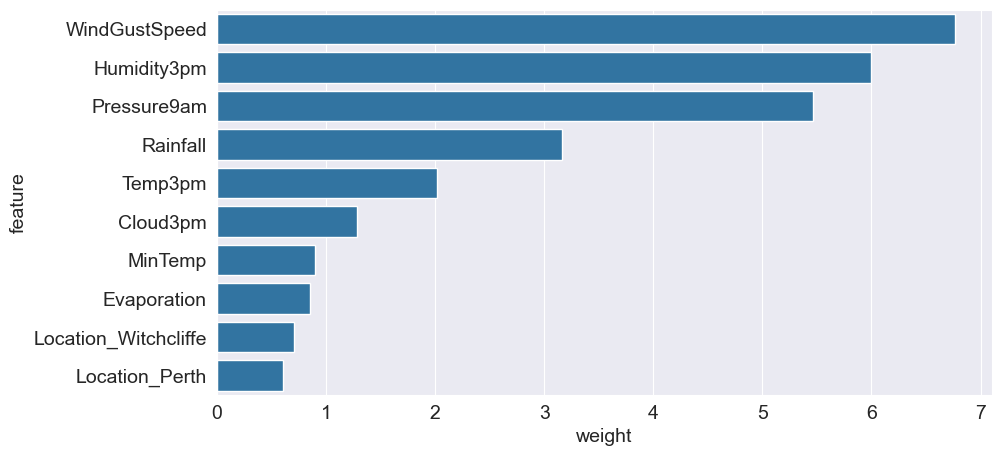

In [176]:
#Making Predicions and Evaluating the Model
plt.figure(figsize=(10, 5))
sns.barplot(data= weight_df.sort_values('weight', ascending= False).head(10), x = 'weight', y= 'feature' )

In [177]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [178]:
X_train

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574      0.153846      0.275862         0.71         0.22     0.449587       0.4800  0.888889   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574      0.030769      0.252874         0.44         0.25     0.497521       0.4912  0.492351   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078      0.146154      0.298851         0.38         0.30     0.447934       0.5056  0.492351   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535      0.084615      0.103448         0.45         0.16     0.613223       0.5712  0.492351   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318      0.053846      0.229885         0.82         0.33     0.500826       0.4624  0.777778   
...          ...       ...       ...          ...       ...            ...           ...           ...          ...          ...          ...          ...       ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822      0.184615      0.298851         0.22         0.13     0.555372       0.5232  0.492351   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798      0.146154      0.229885         0.16         0.08     0.530579       0.4880  0.492351   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814      0.200000      0.103448         0.15         0.08     0.519008       0.4944  0.492351   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822      0.215385      0.195402         0.22         0.09     0.553719       0.5136  0.492351   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636      0.230769      0.149425         0.16         0.09     0.522314       0.4656  0.492351   

        Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  Location_Albany  Location_Albury  Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0       0.499917  0.508439  0.522073                0.0              0.0              1.0                    0.0                     0.0                0.0   
1       0.499917  0.514768  0.570058                0.0              0.0              1.0                    0.0                     0.0                0.0   
2       0.222222  0.594937  0.548944                0.0              0.0              1.0                    0.0                     0.0                0.0   
3       0.499917  0.533755  0.612284                0.0              0.0              1.0                    0.0                     0.0                0.0   
4       0.888889  0.527426  0.673704                0.0              0.0              1.0                    0.0                     0.0                0.0   
...          ...       ...       ...                ...              ...              ...                    ...                     ...                ...   
144548  0.499917  0.651899  0.714012                0.0              0.0              0.0                    0.0                     0.0                0.0   
144549  0.499917  0.761603  0.771593                0.0              0.0              0.0                    0.0                     0.0                0.0   
144550  0.499917  0.778481  0.788868                0.0              0.0              0.0                    0.0                     0.0                0.0   
144551  0.499917  0.780591  0.817658                0.0              0.0              0.0                    0.0                     0.0                0.0   
144552  0.499917  0.786920  0.821497                0.0              0.0              0.0                    0.0                     0.0                0.0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  Lo

In [179]:
train_preds = model.predict(X_train)

In [180]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(97988,), dtype=object)

In [181]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [182]:
from sklearn.metrics import accuracy_score # là hàm dự đoán độ chính xác của mô hình
accuracy_score(train_targets, train_preds)


0.8519206433440829

In [183]:
train_probs = model.predict_proba(X_train)
train_probs
# hàm này cho ta biết giá trị bên trái tượng trưng cho tỉ lệ không mưa và phải là có mưa


array([[0.94401101, 0.05598899],
       [0.94074123, 0.05925877],
       [0.96093597, 0.03906403],
       ...,
       [0.98749105, 0.01250895],
       [0.98334668, 0.01665332],
       [0.87453345, 0.12546655]], shape=(97988, 2))

In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')
# tạo ra ma trận nhầm lẫn


array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [185]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    return preds


Accuracy: 85.19%


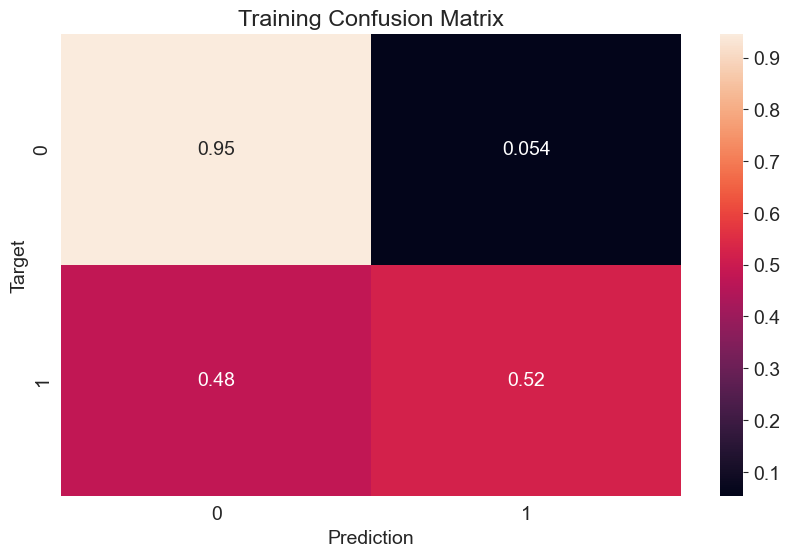

In [186]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.40%


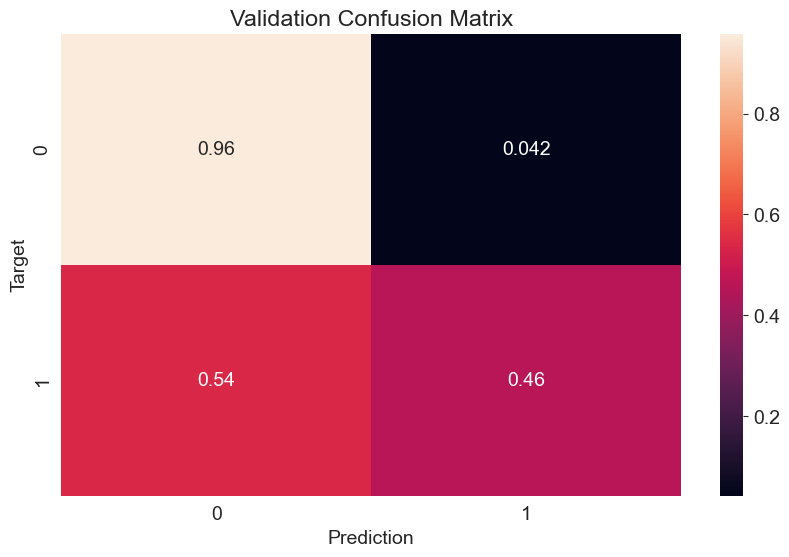

In [187]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 84.20%


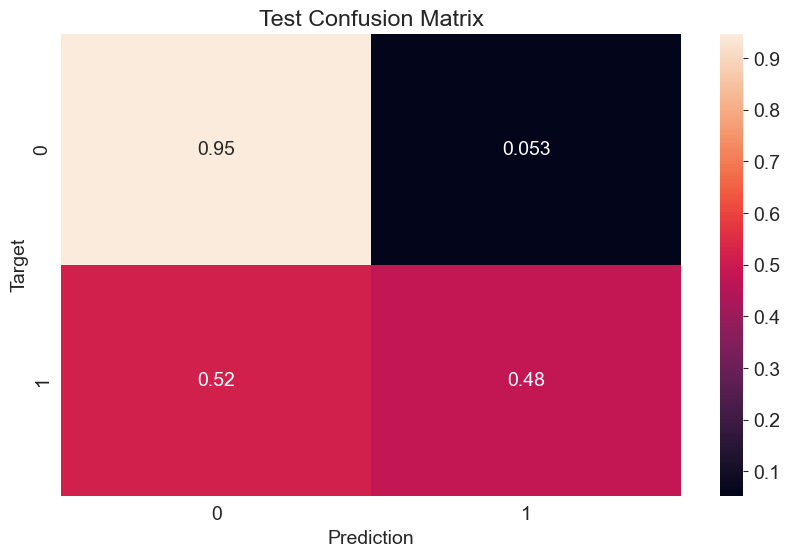

In [188]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [189]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [190]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [191]:
random_guess(X_val)

array(['Yes', 'Yes', 'No', ..., 'Yes', 'Yes', 'Yes'],
      shape=(17089,), dtype='<U3')

In [192]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(17089,), dtype='<U2')

In [193]:
accuracy_score(test_targets, random_guess(X_test))

0.4985997666277713

In [194]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [195]:
#Making Predictions on a Single Input 
new_input = {
    'Date': '2025-07-22',
    'Location': 'Katherine',
    'MinTemp': 21.5,
    'MaxTemp': 31.2,
    'Rainfall': 1.0,
    'Evaporation': 4.3,
    'Sunshine': 8.0,
    'WindGustDir': 'N',
    'WindGustSpeed': 48.0,
    'WindDir9am': 'NE',
    'WindDir3pm': 'N',
    'WindSpeed9am': 14.0,
    'WindSpeed3pm': 22.0,
    'Humidity9am': 82.0,
    'Humidity3pm': 56.0,
    'Pressure9am': 1008.4,
    'Pressure3pm': 1005.7,
    'Cloud9am': 5.0,
    'Cloud3pm': 4.0,
    'Temp9am': 23.5,
    'Temp3pm': 30.7,
    'RainToday': 'Yes'
}


In [196]:
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0  2025-07-22  Katherine     21.5     31.2       1.0          4.3       8.0           N           48.0         NE          N          14.0          22.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
0         56.0       1008.4       1005.7       5.0       4.0     23.5     30.7       Yes

In [197]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10656\746609020.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10656\746609020.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10656\746609020.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [198]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0  0.707547  0.680529  0.002695     0.029655  0.551724       0.325581      0.107692      0.252874         0.82         0.56     0.461157       0.4576  0.555556   

   Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  Location_Albany  Location_Albury  Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0  0.444444  0.647679  0.692898                0.0              0.0              0.0                    0.0                     0.0                0.0   

   Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0               0.0                0.0              0.0                0.0             0.0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  Location_Launceston  Location_Melbourne  Location_MelbourneAirport  Location_Mildura  Location_Moree  \
0                 0.0              0.0                 1.0                  0.0                 0.0                        0.0               0.0             0.0   

   Location_MountGambier  Location_MountGinini  Location_Newcastle  Location_Nhil  Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  Location_PearceRAAF  \
0                    0.0                   0.0                 0.0            0.0                 0.0                     0.0                 0.0                  0.0   

   Location_Penrith  Location_Perth  Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  Location_SalmonGums  Location_Sydney  \
0               0.0             0.0                    0.0                0.0                0.0            0.0                  0.0              0.0   

   Location_SydneyAirport  Location_Townsville  Location_Tuggeranong  Location_Uluru  Location_WaggaWagga  Location_Walpole  Location_Watsonia  Location_Williamtown  \
0                     0.0                  0.0                   0.0             0.0                  0.0               0.0                0.0                   0.0   

   Location_Witchcliffe  Location_Wollongong  Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  \
0                   0.0                  0.0               0.0            0.0              0.0              0.0            1.0             0.0              0.0   

   WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0            0.0             0.0              0.0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  WindDir9am_NNW  WindDir9am_NW  \
0              0.0              0.0           0.0             0.0             0.0           0.0            1.0             0.0             0.0            0.0   

   WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  \
0           0.0            0.0             0.0             0.0            0.0                 0.0           0.0             0.0             0.0           0.0   

   WindDir3pm_ENE  WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0             0.0           1.0            0.0             0.0             0.0            0.0           0.0            0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  
0             0.

In [199]:
prediction = model.predict(X_new_input)[0]
prediction

'No'

In [200]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.68122772, 0.31877228])

In [201]:
for col, cats in zip(categorical_cols, encoder.categories_):
    val = new_input_df[col].iloc[0]
    if val not in cats:
        print(f"⚠️ Giá trị '{val}' không có trong encoder của cột '{col}'")



In [202]:
#Saving and Loading Trained Models : Lưu mô hình 

In [203]:
import joblib

In [204]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}
 #  Tạo một dictionary aussie_rain lưu toàn bộ pipeline (mô hình, tiền xử lý, danh sách cột, v.v.)

In [205]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')
#Lưu toàn bộ pipeline vào file aussie_rain.joblib để tái sử dụng sau này.

['aussie_rain.joblib']

In [206]:
aussie_rain2 = joblib.load('aussie_rain.joblib')
#Tải lại pipeline đã lưu để kiểm tra hoặc sử dụng tiếp.

In [207]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)
#Dùng model đã tải để dự đoán tập X_test, sau đó tính độ chính xác so với nhãn thật test_targets.

0.8420070011668611

In [208]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

raw_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\weatherAUS.csv\weatherAUS.csv")
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

train_targets = train_df[target_col].copy()
val_targets = val_df[target_col].copy()
test_targets = test_df[target_col].copy()

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_encoded = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]), columns=encoded_cols, index=train_inputs.index)
val_encoded = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]), columns=encoded_cols, index=val_inputs.index)
test_encoded = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns=encoded_cols, index=test_inputs.index)

train_inputs = pd.concat([train_inputs[numeric_cols], train_encoded], axis=1)
val_inputs = pd.concat([val_inputs[numeric_cols], val_encoded], axis=1)
test_inputs = pd.concat([test_inputs[numeric_cols], test_encoded], axis=1)

train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]
